In [13]:
import glob 
import cv2 
import torch 
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import sys 

sys.path.append("/home/mojo/github/world-models-pytorch")

from models.vae import VAE


# Plot Examples

Lets plot some reconstructed images from our VAE to check if it works.

In [18]:
model_checkpoint = "/home/mojo/github/world-models-pytorch/exps/VAE/2024-08-10_bs_512_epochs_50_latentsize_64/weights/best.pth"

In [19]:
data_dir = "/data/world-models"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
model = VAE(latent_size=64, in_channels=3)
model = model.to(device)

In [21]:
model.load_state_dict(torch.load(model_checkpoint))
model.eval()

/tmp/ipykernel_152914/3034707334.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_checkpoint))


VAE(
  (encoder): Encoder(
    (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2))
    (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (conv3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (fc_mu): Linear(in_features=1024, out_features=64, bias=True)
    (fc_log_sigma): Linear(in_features=1024, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=64, out_features=1024, bias=True)
    (deconv1): ConvTranspose2d(1024, 128, kernel_size=(5, 5), stride=(2, 2))
    (deconv2): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2))
    (deconv3): ConvTranspose2d(64, 32, kernel_size=(6, 6), stride=(2, 2))
    (deconv4): ConvTranspose2d(32, 3, kernel_size=(6, 6), stride=(2, 2))
  )
)

In [22]:
files = glob.glob(data_dir + "/**/*.npz", recursive=True)
len(files)

10008

In [23]:
samples = random.sample(files, 10)

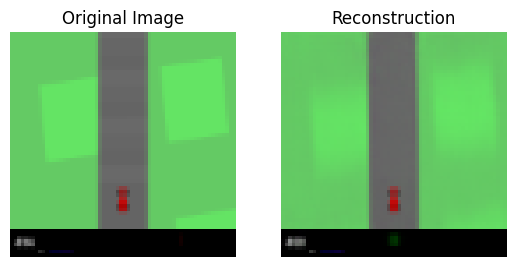

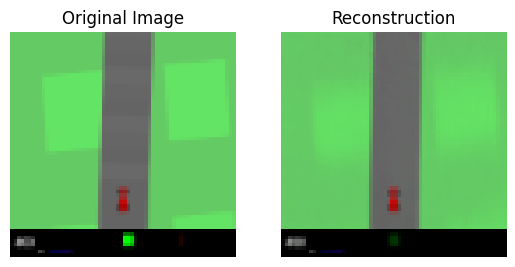

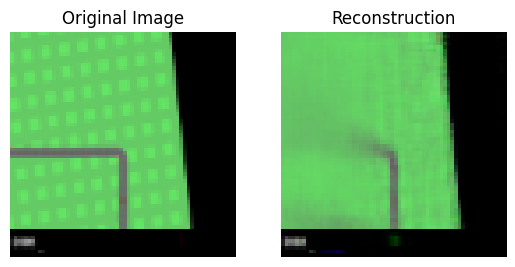

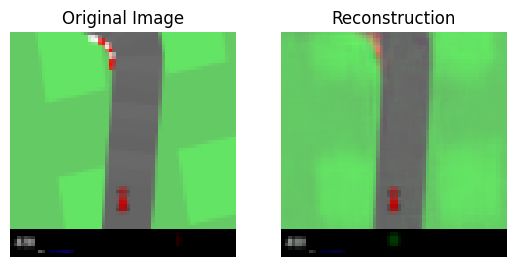

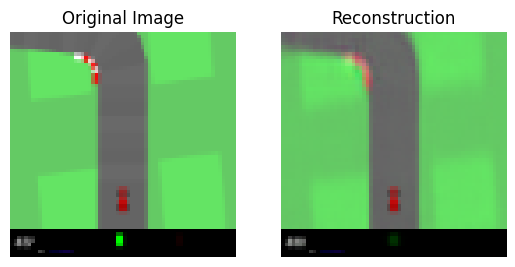

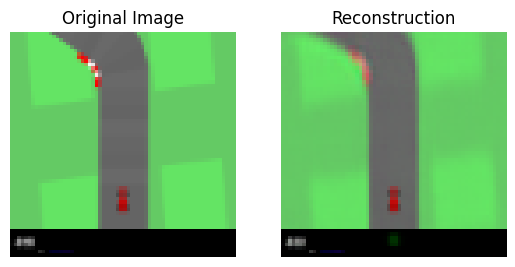

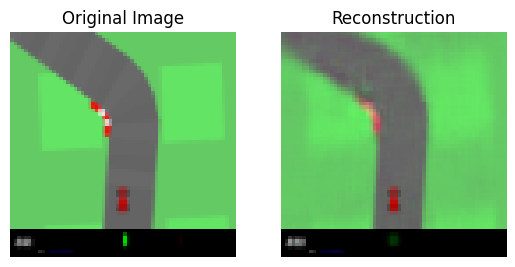

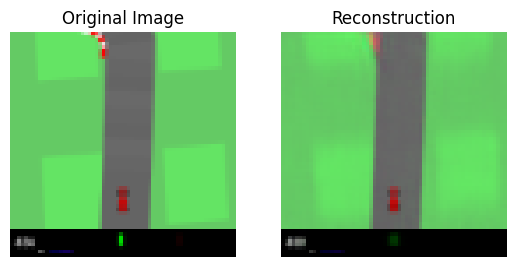

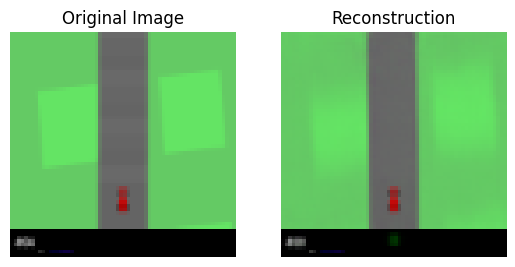

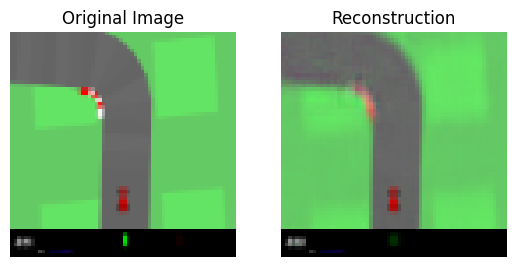

In [24]:
for sample in samples:
    with np.load(sample) as data_sample: 
        data = {k: np.copy(v) for k, v in data_sample.items()} 
    idx = random.randint(0, 999) 
    img = data['observations'][idx]
    img = cv2.resize(img, (64, 64))
    img_org = img.copy()
    img = torch.tensor(img).float() / 255. 
    img = img.unsqueeze(0)
    img = img.transpose(1, 3)
    img = img.to(device)
    
    with torch.no_grad():
        pred = model(img)

    reconst = pred[0].transpose(1,3).squeeze(0).cpu().numpy()
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_org)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    axs[1].imshow(reconst)
    axs[1].set_title("Reconstruction")
    axs[1].axis("off")
    plt.show()